# Passangger Analysis

### Data yang digunakan adalah Data penumpang Transjakarta selama tahun 2021 yang diambil dari situs Jakarta Open Data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#### Karena datanya terpisah tiap bulan maka data digabung terlebih dahulu

In [3]:
data = pd.read_csv("./data penumpang tj 2021/data-penumpang-bus-transjakarta-januari-2021.csv")

files = [file for file in os.listdir("./data penumpang tj 2021")]

all_data = pd.DataFrame()

for file in files:
    data = pd.read_csv("./data penumpang tj 2021/"+file)
    all_data = pd.concat(([all_data, data]))

#### Data Understanding

In [3]:
all_data.sample(10)

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
5,2021,6,Mikrotrans,JAK.75,Cililitan - Kp. Pulo,49284
104,2021,1,Angkutan Umum Integrasi,3E,Puri Kembangan - Sentraland Cengkareng,24385
34,2021,12,Mikrotrans,JAK.35,Pangkalan Jati - Rawamangun,37850
49,2021,9,Mikrotrans,"JAK,19",Pinang Ranti - Kampung Rambutan,80525
88,2021,2,Angkutan Umum Integrasi,8D,Joglo - Blok M,28516
48,2021,4,Mikrotrans,JAK.20,Cawang UKI - Lubang Buaya,67887
113,2021,6,Angkutan Umum Integrasi,1C,Pesanggrahan - Blok M,14938
18,2021,11,Mikrotrans,JAK.52,Kalideres - Muara Angke,79531
104,2021,3,Angkutan Umum Integrasi,4F,Pinang Ranti - Pulo Gadung,41635
36,2021,2,Mikrotrans,JAK.33,Pulo Gadung - Kota,47276


In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1473 entries, 0 to 121
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 80.6+ KB


#### Memeriksa apakah datanya terdapat duplicated dan missing value

In [5]:
all_data[all_data.duplicated() == True]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang


In [6]:
all_data[all_data.isna() == True]

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
117,NaN,NaN,NaN,NaN,NaN,NaN
118,NaN,NaN,NaN,NaN,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
all_data.sample(20)

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
74,2021,8,BRT,5,Kampung Melayu - Ancol,228704
62,2021,12,Mikrotrans,JAK.10,Tanah Abang - Kota,62581
53,2021,6,Mikrotrans,JAK.15,Bulak Turi - Tanjung Priok,131981
97,2021,7,Angkutan Umum Integrasi,6N,Ragunan - Blok M via Kemang,12623
88,2021,5,Angkutan Umum Integrasi,8D,Joglo - Blok M,27926
39,2021,10,Mikrotrans,JAK.30,Grogol - Meruya via Roxy,133054
34,2021,6,Mikrotrans,JAK.35,Pangkalan Jati - Rawamangun,36012
1,2021,5,Mikrotrans,JAK.85,Bintara - Cipinang Indah,28069
20,2021,5,Mikrotrans,JAK.50,Kalideres - Puri Kembangan,67209
105,2021,11,Angkutan Umum Integrasi,4F,Pinang Ranti - Pulo Gadung,43945


### Analysis

In [43]:
all_data.describe()['jumlah_penumpang']

count    1.473000e+03
mean     8.167586e+04
std      1.265331e+05
min      0.000000e+00
25%      2.501600e+04
50%      4.962800e+04
75%      7.513800e+04
max      1.131439e+06
Name: jumlah_penumpang, dtype: float64

In [8]:
print("Jumlah penumpang =", all_data['jumlah_penumpang'].sum())

Jumlah penumpang = 120308547


In [13]:
rata_penumpang_tiap_bulan = 120308547 / 12
rata_penumpang_tiap_bulan

10025712.25

In [9]:
print("Banyaknya rute =" ,len(all_data['kode_trayek'].unique()))

Banyaknya rute = 135


In [26]:
result = all_data.groupby('trayek')['jumlah_penumpang'].sum()
result = result.reset_index()
result = result.nlargest(10, 'jumlah_penumpang')
print(result)

                                trayek  jumlah_penumpang
5                        Blok M - Kota          10079752
75                Pinang Ranti - Pluit           7694406
34              Kalideres - Pasar Baru           5250726
59               Lebak Bulus - Harmoni           5122397
37              Kampung Melayu - Ancol           4902814
46   Kampung Rambutan - Kampung Melayu           4372447
125              Tanjung Priok - PGC 2           4262272
90              Ragunan - Dukuh Atas 2           3996604
81             Pulo Gadung 1 - Harmoni           3836531
11                   Ciledug - Tendean           3337261


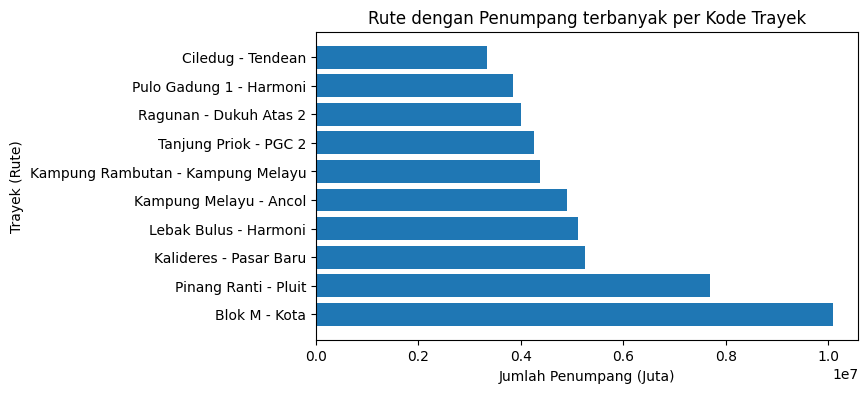

In [24]:
plt.figure(figsize=(7, 4))  # Ukuran plot (opsional)

# Buat plot dengan x sebagai kode_trayek dan y sebagai jumlah_penumpang
plt.barh(result['trayek'], result['jumlah_penumpang'])
    
# Atur label dan judul plot
plt.xlabel('Jumlah Penumpang (Juta)')
plt.ylabel('Trayek (Rute)')
plt.title('Rute dengan Penumpang terbanyak per Kode Trayek')
# Tampilkan plot
plt.show()

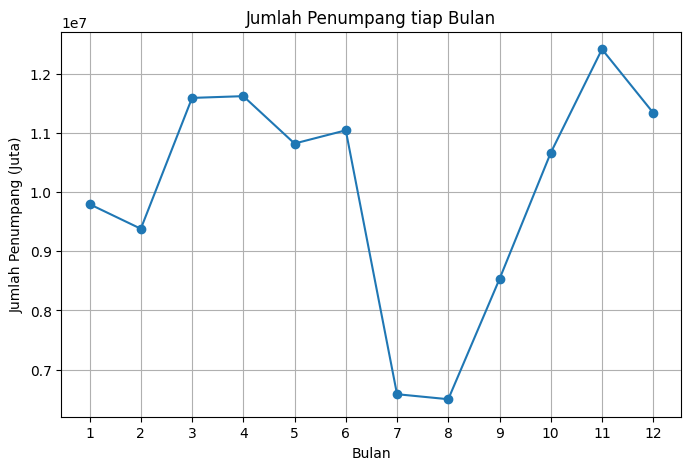

In [23]:
total_penumpang_per_month = all_data.groupby(all_data['bulan'])['jumlah_penumpang'].sum()
plt.figure(figsize=(8, 5))
plt.plot(total_penumpang_per_month.index, total_penumpang_per_month.values, marker='o', linestyle='-')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penumpang (Juta)')
plt.title('Jumlah Penumpang tiap Bulan')
plt.xticks(total_penumpang_per_month.index)
plt.grid(True)
plt.show()

In [38]:
penumpang_by_jenis = all_data.groupby('jenis')['jumlah_penumpang'].sum().reset_index()
penumpang_by_jenis

,jenis,jumlah_penumpang
0,Angkutan Umum Integrasi,11281390
1,BRT,59111356
2,Mikrotrans,49915801


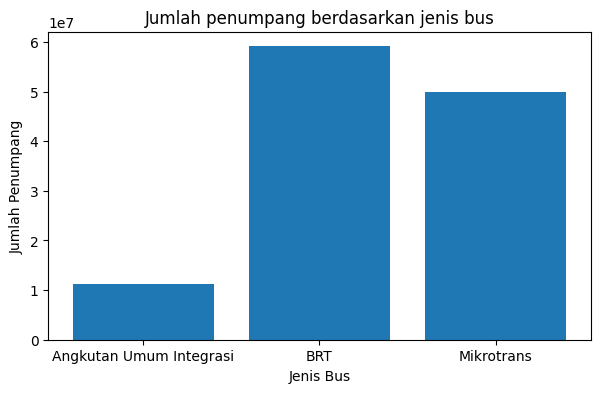

In [36]:
plt.figure(figsize=(7, 4))  # Ukuran plot (opsional)

# Buat plot dengan x sebagai kode_trayek dan y sebagai jumlah_penumpang
plt.bar(penumpang_by_jenis['jenis'], penumpang_by_jenis['jumlah_penumpang'])
    
# Atur label dan judul plot
plt.xlabel('Jenis Bus')
plt.ylabel('Jumlah Penumpang')
plt.title('Jumlah penumpang berdasarkan jenis bus')
# Tampilkan plot
plt.show()

In [40]:
zero_penumpang = all_data[all_data['jumlah_penumpang'] == 0]
count_bis_zero_penumpang_per_month = zero_penumpang.groupby(zero_penumpang['bulan'])['kode_trayek'].nunique()
count_bis_zero_penumpang_per_month

bulan
8      3
9      3
10     3
11     3
12    35
Name: kode_trayek, dtype: int64

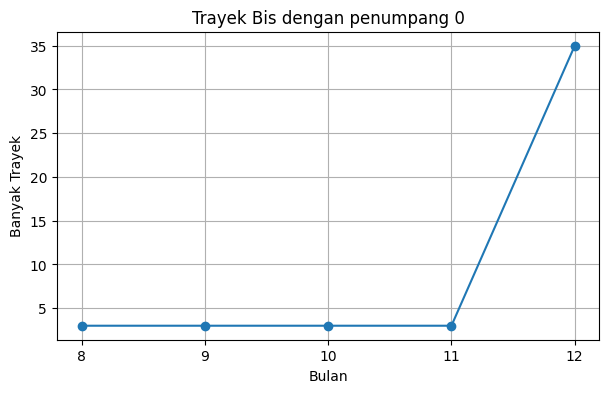

In [41]:
plt.figure(figsize=(7, 4))
plt.plot(count_bis_zero_penumpang_per_month.index, count_bis_zero_penumpang_per_month.values, marker='o', linestyle='-')
plt.xlabel('Bulan')
plt.ylabel('Banyak Trayek')
plt.title('Trayek Bis dengan penumpang 0')
plt.xticks(count_bis_zero_penumpang_per_month.index)
plt.grid(True)
plt.show()

In [16]:
total_rute_keseluruhan = all_data['kode_trayek'].nunique()
total_rute_0_penumpang = zero_penumpang['kode_trayek'].nunique()
persentase_rute_0_penumpang = (total_rute_0_penumpang / total_rute_keseluruhan) * 100
persentase_rute_0_penumpang

25.925925925925924

In [7]:
penumpang_banyak = all_data.groupby('kode_trayek')['jumlah_penumpang'].sum()
penumpang_banyak = penumpang_banyak.reset_index()
penumpang_banyak

,kode_trayek,jumlah_penumpang
0,1,10079752
1,10,4262272
2,10K,363490
3,11,1603385
4,11D,560742
...,...,...
130,JAK.77,77697
131,JAK.80,724712
132,JAK.84,481820
133,JAK.85,334063


In [9]:
count_greater_than_100000 = (penumpang_banyak['jumlah_penumpang'] > 100000).sum()
count_greater_than_100000
count_less_than_100000 = 135 - count_greater_than_100000

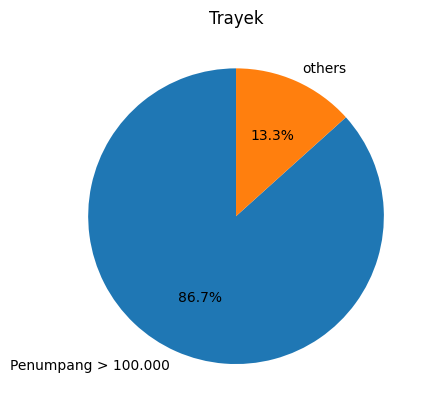

In [12]:
categories = ['Penumpang > 100.000', 'others']
percentages = [count_greater_than_100000, count_less_than_100000]

plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=90)

# Menambahkan judul
plt.title('Trayek')

# Menampilkan pie chart
plt.show()

## Interprate

### 1. Jumlah keseluruhan penumpang TransJakarta di tahun 2021 adalah 120.308.547, dengan total rute yang beroprasi sebanyak 135 rute
### 2. Rata - rata penumpang setiap bulannya adalah 10.025.712,25
### 3. Rute penumpang terbanyak adalah jurusan Blok M - Kota dengan jumlah penumpang sebanyak 10.079.752
### 4. Sekitar 86.7% trayek yang beroprasi di tahun 2021 jumlah penumpangnya lebih dari 100.000
### 5. Jumlah penumpang terbanyak terjadi pada bulan november
### 6. Terdapat beberapa trayek yang memiliki jumlah penumpang 0 (3 trayek pada bulan agustus, september, oktober, november, dan 35 trayek pada bulan desember)
### 7. Bus jenis BRT menjadi jenis bus yang paling banyak jumlah penumpangnya (mungkin karena bus jenis BRT mempunyai kapasitas yang lebih besar dari jenis bus lainnya).